# A brief introduction to ggplot 2

We first load the `ggplot2` and `tidyr` libraries.

In [2]:
library("ggplot2")

Let us have a glance at the dataset, it should be included in your R-session.

In [3]:
CO2

,Plant,Type,Treatment,conc,uptake
1,Qn1,Quebec,nonchilled,95,16
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2
7,Qn1,Quebec,nonchilled,1000,39.7
8,Qn2,Quebec,nonchilled,95,13.6
9,Qn2,Quebec,nonchilled,175,27.3
10,Qn2,Quebec,nonchilled,250,37.1


In [4]:
summary(CO2)

     Plant             Type         Treatment       conc          uptake     
 Qn1    : 7   Quebec     :42   nonchilled:42   Min.   :  95   Min.   : 7.70  
 Qn2    : 7   Mississippi:42   chilled   :42   1st Qu.: 175   1st Qu.:17.90  
 Qn3    : 7                                    Median : 350   Median :28.30  
 Qc1    : 7                                    Mean   : 435   Mean   :27.21  
 Qc3    : 7                                    3rd Qu.: 675   3rd Qu.:37.12  
 Qc2    : 7                                    Max.   :1000   Max.   :45.50  
 (Other):42                                                                  

ggplot only accepts `data.frame`s.

## Building a ggplot

ggplot plots are contructed layer by layer. The `ggplot` function can initiate the basic plotting object, i.e. `p`. Before I will show how this layer structure works, we will first look into how individual layers are built.

We first assign data to be plotted.

In [6]:
p <- ggplot(data = CO2)

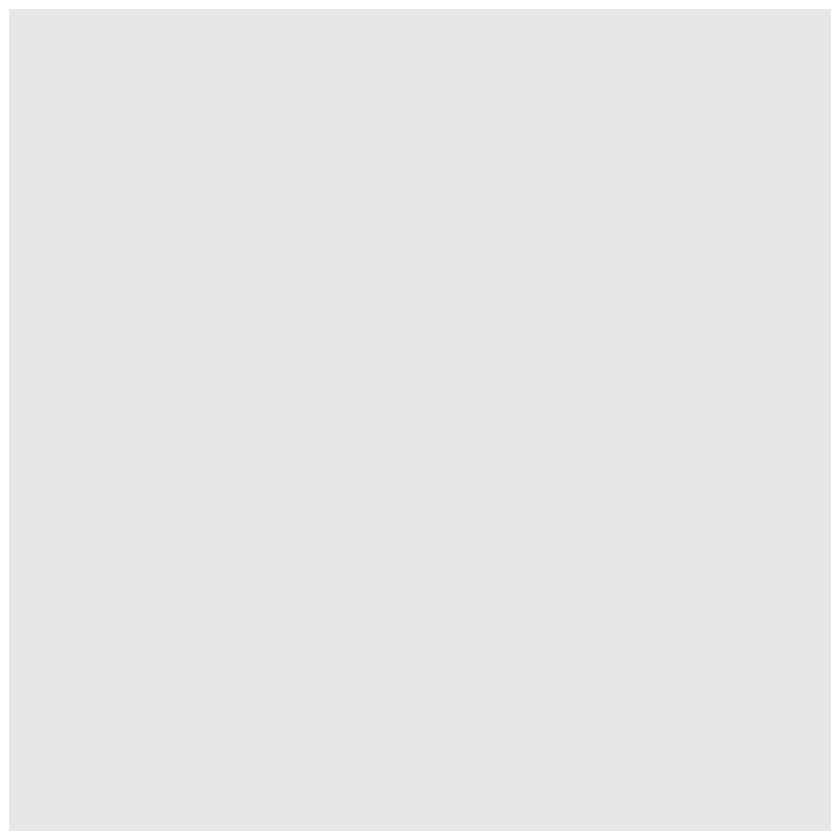

In [7]:
p

We get this empty canvas when we call the plot object `p` without instructions on how we want the data to be represented.

In order to achieve this we need to choose:
* a `geom`etry
* a `mapping`

The `geom`etry is the type of plot that we want, e.g. histogram, boxplot, scatterplot, lineplot etc. and the `mapping` which indicates what data variable we want to map to a given `aesthetic`.

## Mappings and aesthetics

To illustrate aesthetics lets first pick a simple `geom`etry, i.e. a scatterplot (`geom_point`). `geom_point`'s aesthetics include:

* ‘*x*’
* ‘*y*’
* ‘alpha’
* ‘colour’
* ‘fill’
* ‘shape’
* ‘size’
* ‘stroke’

So to each of these aesthetics we can map a variable of the CO2 data. Note, the aesthetics marked with a star are required, i.e. here we need to set `x` and `y`.

To start with we can map the concentration to `x` and the uptake to `y`. Note the function to specify a set of aesthetics is `aes()` and it is passed to `mapping` within a geometry (or when setting up the plot).

In [8]:
geom_point(mapping = aes(x = conc, y = uptake))

mapping: x = conc, y = uptake 
geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

This does not produce a plot yet, as you may have noticed that as of yet it would not know where the data comes from.

This brings us back to the topic of building ggplots layer by layer; we add a layer `geom_point` to the ggplot object hosting the data `p` using the `+` operator.

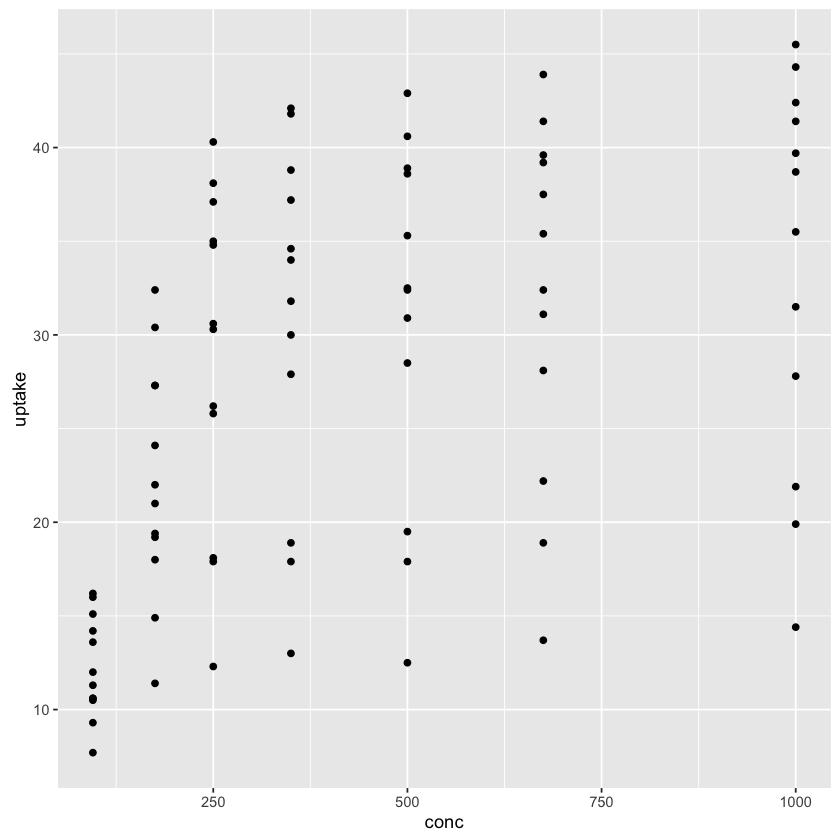

In [9]:
p + geom_point(mapping = aes(x = conc, y = uptake))

ggplot takes care to pick the scales, gridlines, set axis labels etc.

We also need to note that the variables mapped to aesthetics can be continuous or discrete. Depending on this, mappings might more or less sense, but that will often depend on the plot.

It is now very straightforward to map more variable to the `geom_point`'s. For example we might want to map the `Treatment` variable to the `color` of the points.

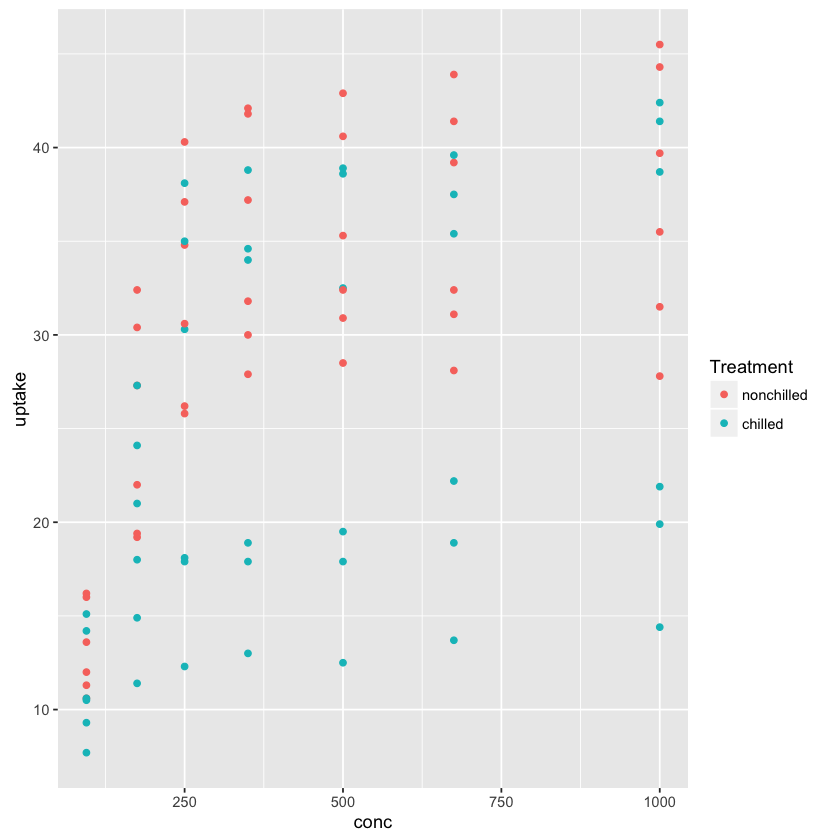

In [10]:
p + geom_point(mapping = aes(x = conc, y = uptake, color = Treatment))

Again ggplot takes care to place an appropriate legend.

Here is an other example for mapping a different variable to the color aesthetic.

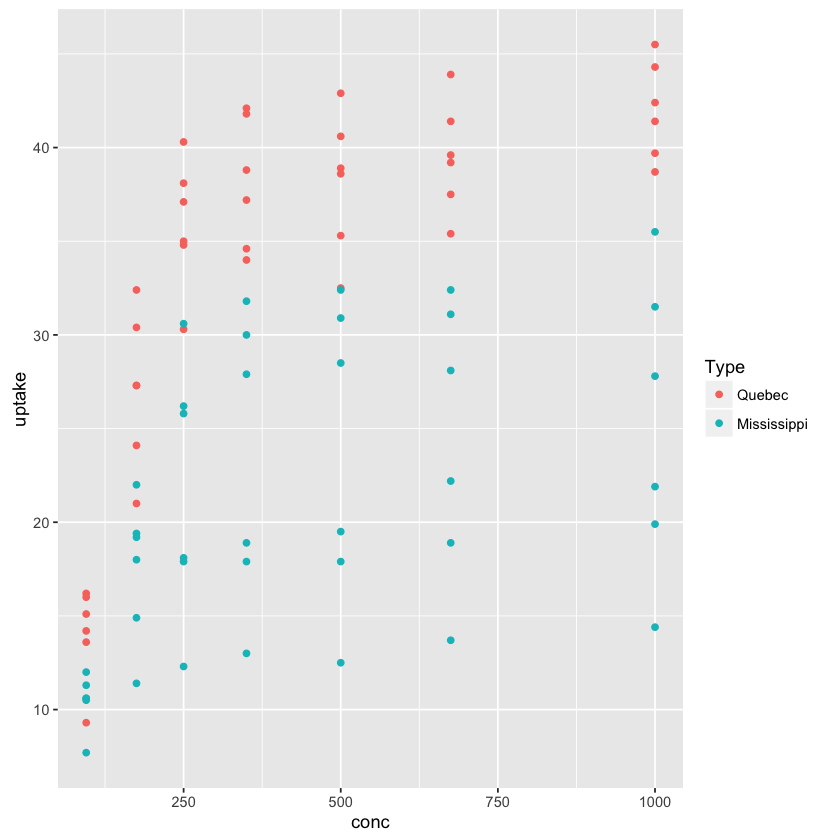

In [11]:
p + geom_point(mapping = aes(x = conc, y = uptake, color = Type))

## Geometries

ggplot has a range of geometries that can be used to plot the data to which has been mapped to aesthetics:

* geom_abline
* geom_blank
* geom_crossbar
* geom_density2d
* geom_freqpoly
* geom_jitter
* geom_map
* geom_polygon
* geom_rect
* geom_smooth
* geom_tile
* geom_area
* geom_boxplot
* geom_curve
* geom_dotplot
* geom_hex
* geom_label
* geom_path
* geom_qq
* geom_ribbon
* geom_spoke
* geom_violin
* geom_bar
* geom_contour
* geom_density
* geom_errorbar
* geom_histogram
* geom_line
* geom_point
* geom_quantile
* geom_rug
* geom_step
* geom_vline
* geom_bin2d
* geom_count
* geom_density_2d
* geom_errorbarh
* geom_hline
* geom_linerange
* geom_pointrange
* geom_raster
* geom_segment
* geom_text

They might have different aesthetics. Furthermore geometries can take other parameters such as position etc. in order to further customise the visualisation but I will not dicuss them now.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


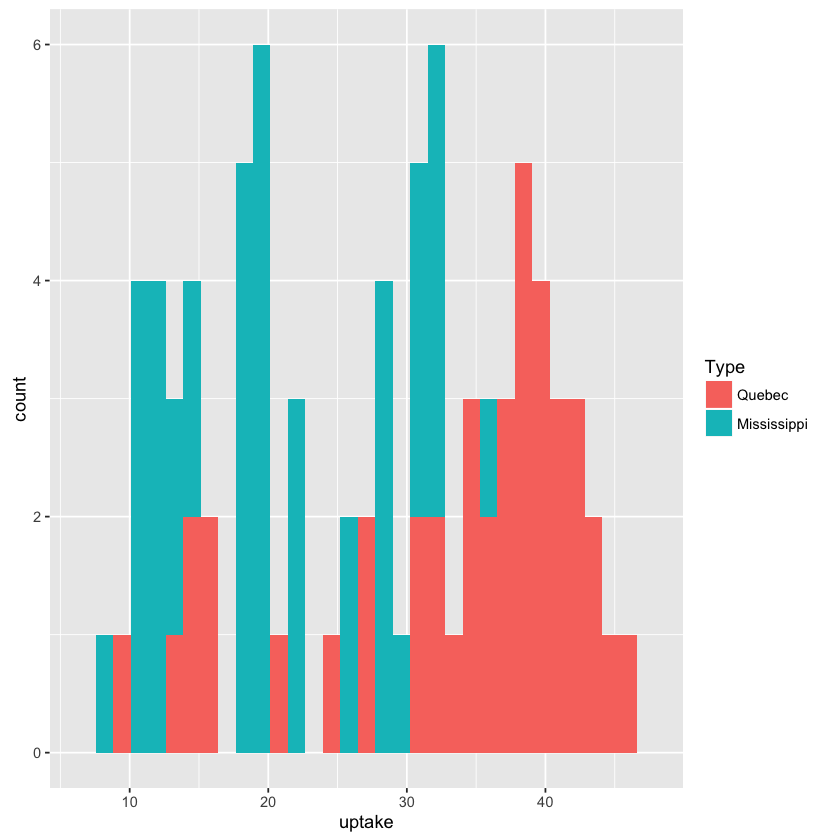

In [12]:
p + geom_histogram(mapping = aes(x = uptake, fill = Type))

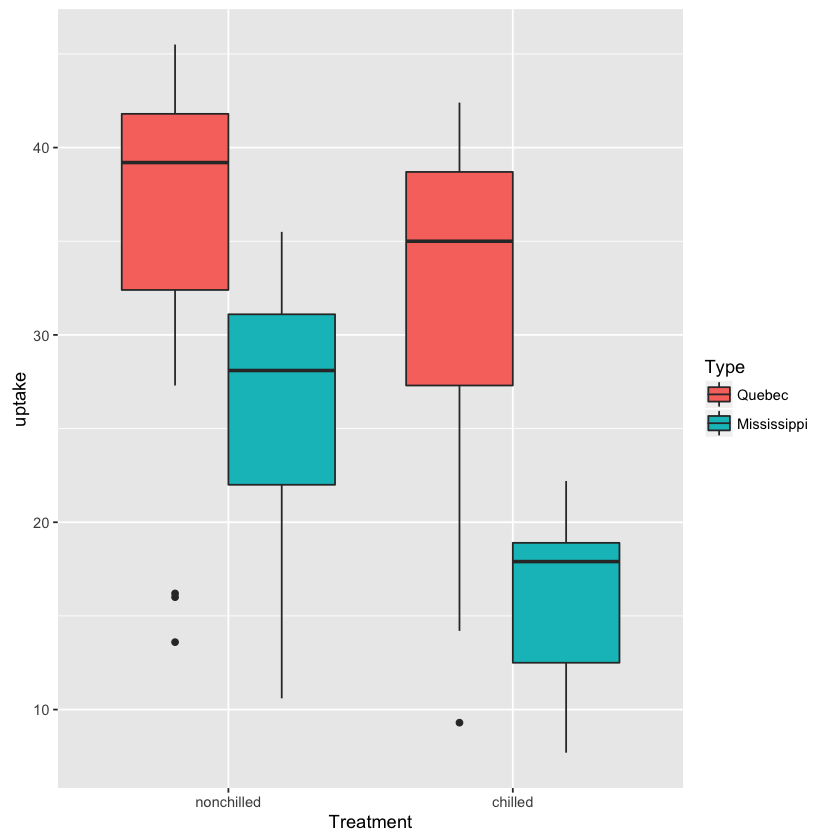

In [16]:
p + geom_boxplot(mapping = aes(x = Treatment, y = uptake, fill = Type))

We can add different `geom`etries to one plot in a layer by layer fashion.

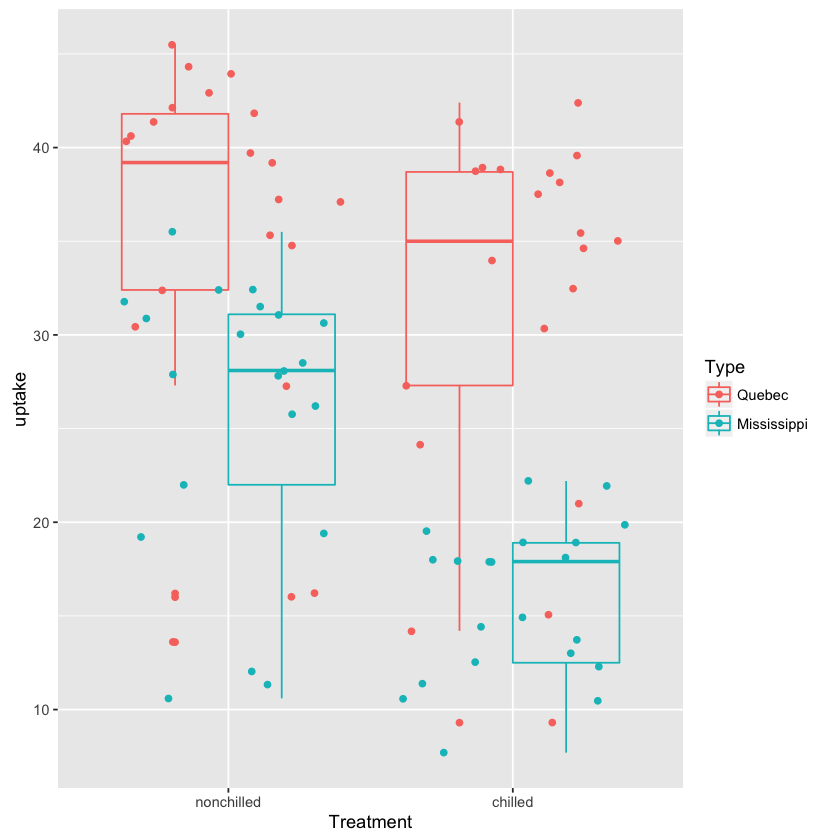

In [19]:
p +
geom_boxplot(mapping = aes(x = Treatment, y = uptake, color = Type), fill = NA) +
geom_jitter(mapping = aes(x = Treatment, y = uptake, color = Type))

In order not to respecify the `mapping` for every `geom`etry we can specify it immediately in the ggplot object.

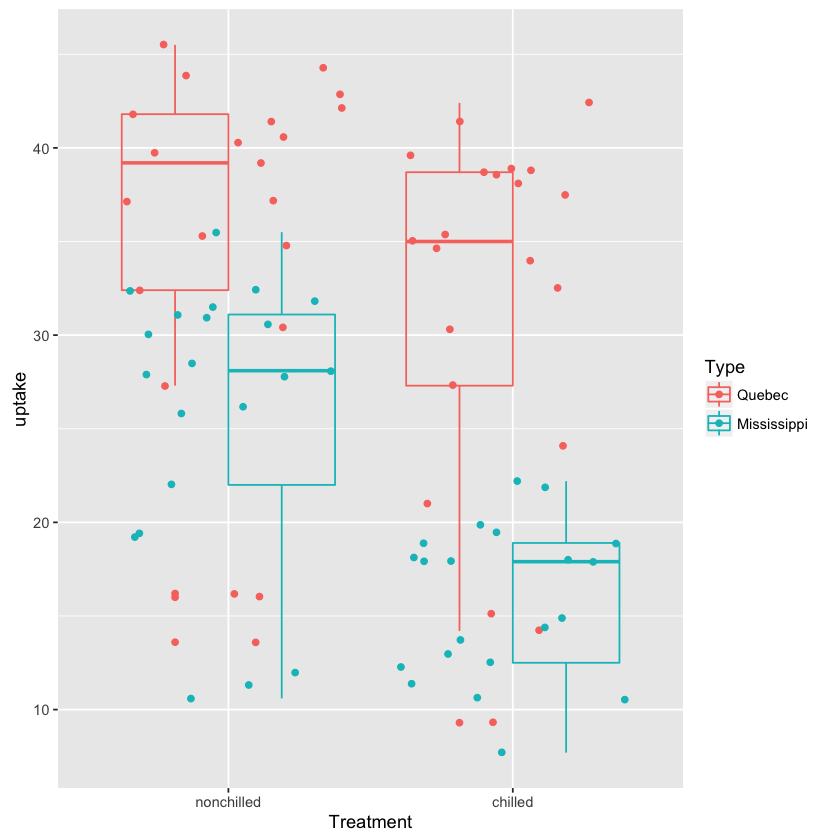

In [20]:
p <- ggplot(data = CO2, mapping = aes(x = Treatment, y = uptake, color = Type))
p <- p +
    geom_boxplot(fill = NA) +
    geom_jitter()
p

## Facets

Sometimes we want to plot subplots to show more different variables in the data. ggplot can do this with `facet_wrap` and `facet_grid`.

We first need to reshape the dataset from a wide to a long format. In this case we have the `Plant`, `Type` and `Treatment` being descriptors and the `uptake` and `conc` being data.

In [44]:
library("tidyr")
CO2

,Plant,Type,Treatment,conc,uptake
1,Qn1,Quebec,nonchilled,95,16
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2
7,Qn1,Quebec,nonchilled,1000,39.7
8,Qn2,Quebec,nonchilled,95,13.6
9,Qn2,Quebec,nonchilled,175,27.3
10,Qn2,Quebec,nonchilled,250,37.1


We could simply select the columns that we want to have gathered...

In [45]:
CO2_gathered <- gather(
    data = CO2,
    key = "variable",
    value = "value",
    uptake, conc
)

... or specify the identifier columns that we do not want to have considered.

In [46]:
CO2_gathered <- gather(
    data = CO2,
    key = "variable",
    value = "value",
    -Plant, -Type, -Treatment
)

This is the resulting table.

In [55]:
CO2_gathered

,Plant,Type,Treatment,variable,value
1,Qn1,Quebec,nonchilled,conc,95
2,Qn1,Quebec,nonchilled,conc,175
3,Qn1,Quebec,nonchilled,conc,250
4,Qn1,Quebec,nonchilled,conc,350
5,Qn1,Quebec,nonchilled,conc,500
6,Qn1,Quebec,nonchilled,conc,675
7,Qn1,Quebec,nonchilled,conc,1000
8,Qn2,Quebec,nonchilled,conc,95
9,Qn2,Quebec,nonchilled,conc,175
10,Qn2,Quebec,nonchilled,conc,250


In [57]:
p <- ggplot(
    data = CO2_gathered,
    mapping = aes(x = Treatment, y = value, color = Type)
)
p <- p +
    geom_boxplot(fill = NA) +
    geom_jitter()

We can then split this plot further into grids with `facet_grid`. 

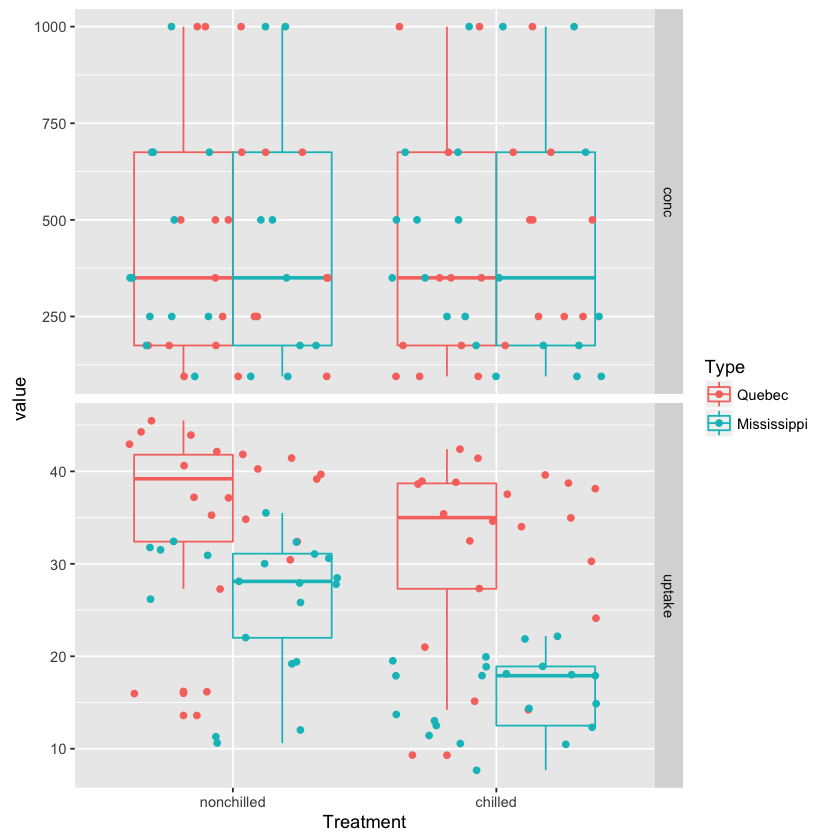

In [59]:
p + facet_grid(variable ~ ., scales = "free_y")

Now we have used the `variable` columns to direct ggplot to make subplots based on the possible values contained in that column, i.e. `uptake` and `conc`.

## Stats

ggplot can also `stat`istics layers to a plot.

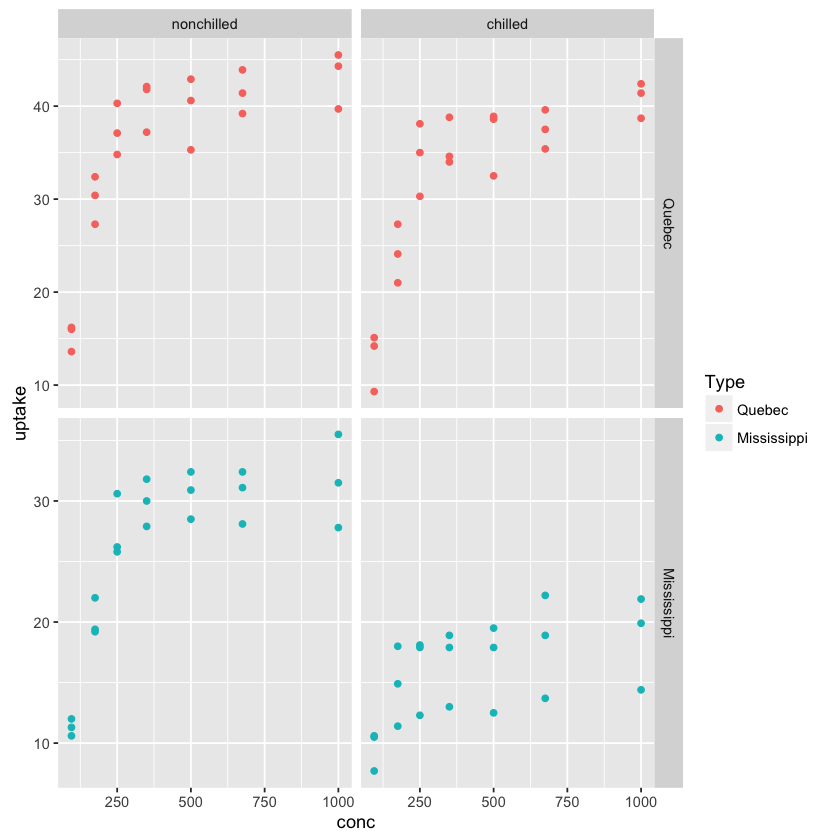

In [61]:
p <- ggplot(
    data = CO2,
    mapping = aes(x = conc, y = uptake, color = Type)
)
p <- p +
    geom_point(fill = NA) +
    facet_grid(Type ~ Treatment, scales = "free_y")
p

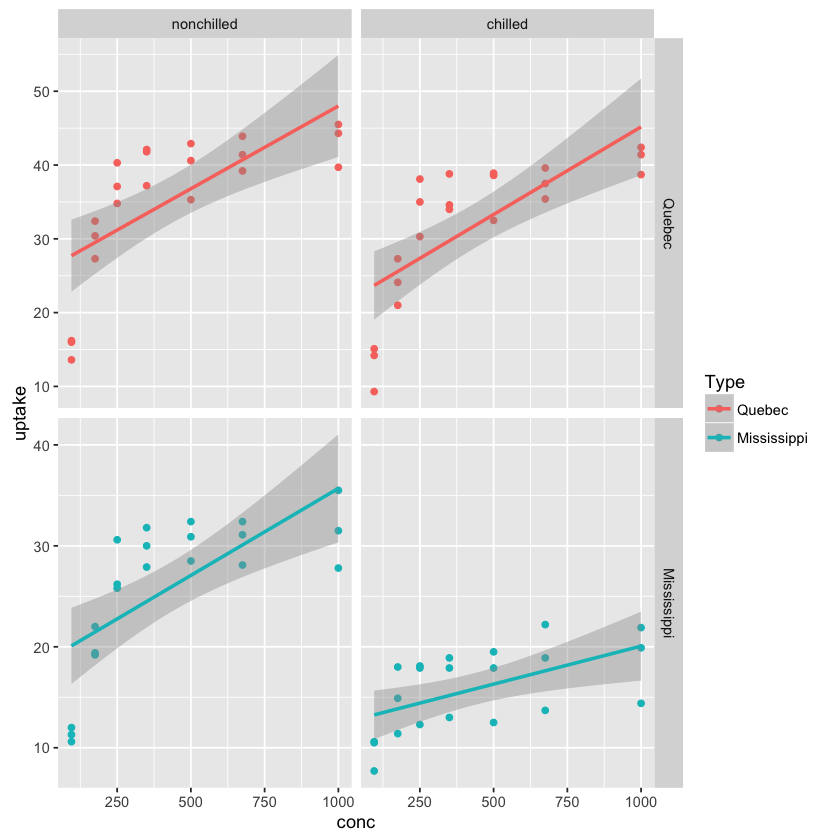

In [62]:
p + geom_smooth(method = 'lm')